# **Data Reading/Data Understanding**

**Importing Skin Cancer Data**

**To do: Take necessary actions to read the data**

Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
root_path = '/content/drive/MyDrive/ColabNotebooks/Melanoma'

import os
os.chdir(root_path)

!unzip CNN_assignment.zip

Archive:  CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer ISIC The I

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# **Dataset Creation**

**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

**Create a dataset**


Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **Dataset visualisation**


**To-do: create a code to visualize one instance of all the nine classes present in the dataset**

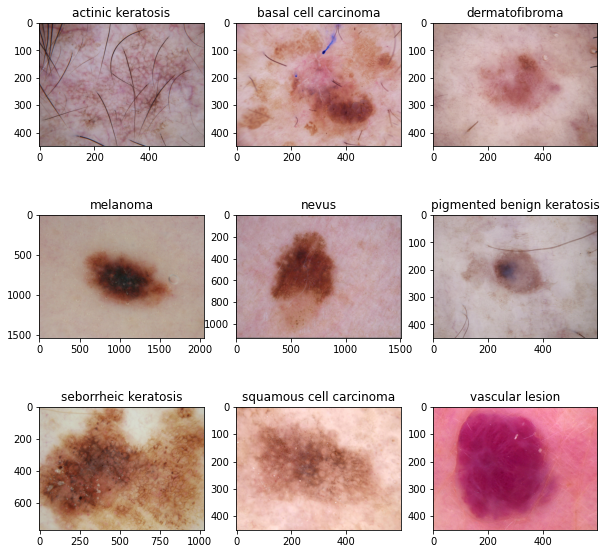

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Model Building & training**


**To do: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]**


In [13]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

 **Compile the model**

 
Choose an appropirate optimiser and loss function for model training

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

**Train the model**

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 33s 140ms/step - loss: 2.0581 - accuracy: 0.1881 - val_loss: 2.0206 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 77ms/step - loss: 2.0235 - accuracy: 0.2104 - val_loss: 2.0318 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0202 - accuracy: 0.2003 - val_loss: 2.0400 - val_accuracy: 0.2036
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0213 - accuracy: 0.1864 - val_loss: 2.0240 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0196 - accuracy: 0.2081 - val_loss: 2.0290 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.9990 - accuracy: 0.2165 - val_loss: 1.9635 - val_accuracy: 0.2461
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.9871 - accuracy: 0.2388 - val_loss: 2.0147 - val_accuracy: 0.2103
Epoch 8/20
56/56 [====

**Visualizing training results**

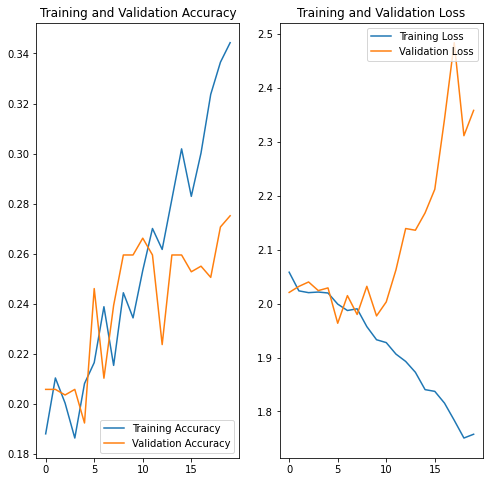

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**To do: Write your findings after the model fit, see if there is an evidence of model overfit or underfit**

**Finding on the first base model**



1.   The model is overfitting because we can also see difference in loss functions in training & test around the 10-14th epoch

2.  The accuracy is just around 45-50% because there are enough features to remember the pattern.


# **Data Augmentation**

In [17]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

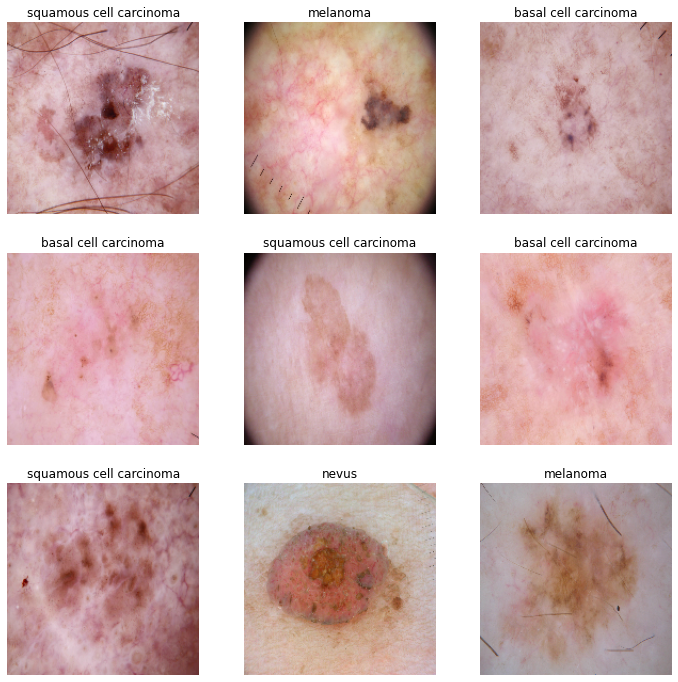

In [18]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**To do: Create the model, compile and train the model**

In [19]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


**Compiling the model**

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Training the model**

In [21]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 92ms/step - loss: 2.0774 - accuracy: 0.1931 - val_loss: 2.0357 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0234 - accuracy: 0.2132 - val_loss: 2.0637 - val_accuracy: 0.1566
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 1.9759 - accuracy: 0.2450 - val_loss: 1.9781 - val_accuracy: 0.2394
Epoch 4/20
56/56 [==============================] - 5s 86ms/step - loss: 1.9163 - accuracy: 0.2662 - val_loss: 1.8660 - val_accuracy: 0.3311
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.8624 - accuracy: 0.2779 - val_loss: 1.8101 - val_accuracy: 0.3020
Epoch 6/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7817 - accuracy: 0.3265 - val_loss: 1.7162 - val_accuracy: 0.3647
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7030 - accuracy: 0.3633 - val_loss: 1.6885 - val_accuracy: 0.4251
Epoch 8/20
56

**Visualizing the results**

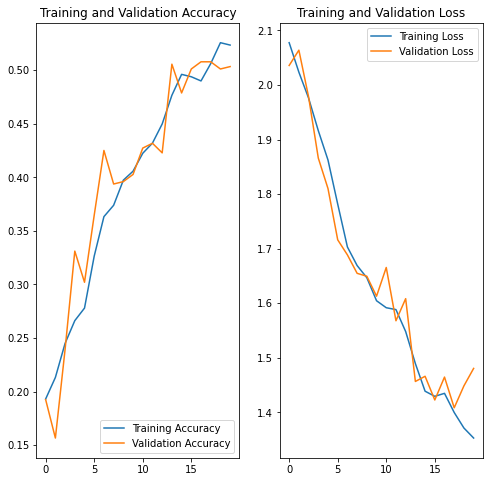

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**To do: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?**

**Finding from Second Model**

*   There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation 
*   We can increase the epochs to increase more the accuracy

# **Class distribution**

**To do: Find the distribution of classes in the training dataset.**


Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
1,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
2,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
3,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
4,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2235,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2236,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2237,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
1,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
2,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
3,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
4,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2235,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2236,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
2237,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion


<BarContainer object of 9 artists>

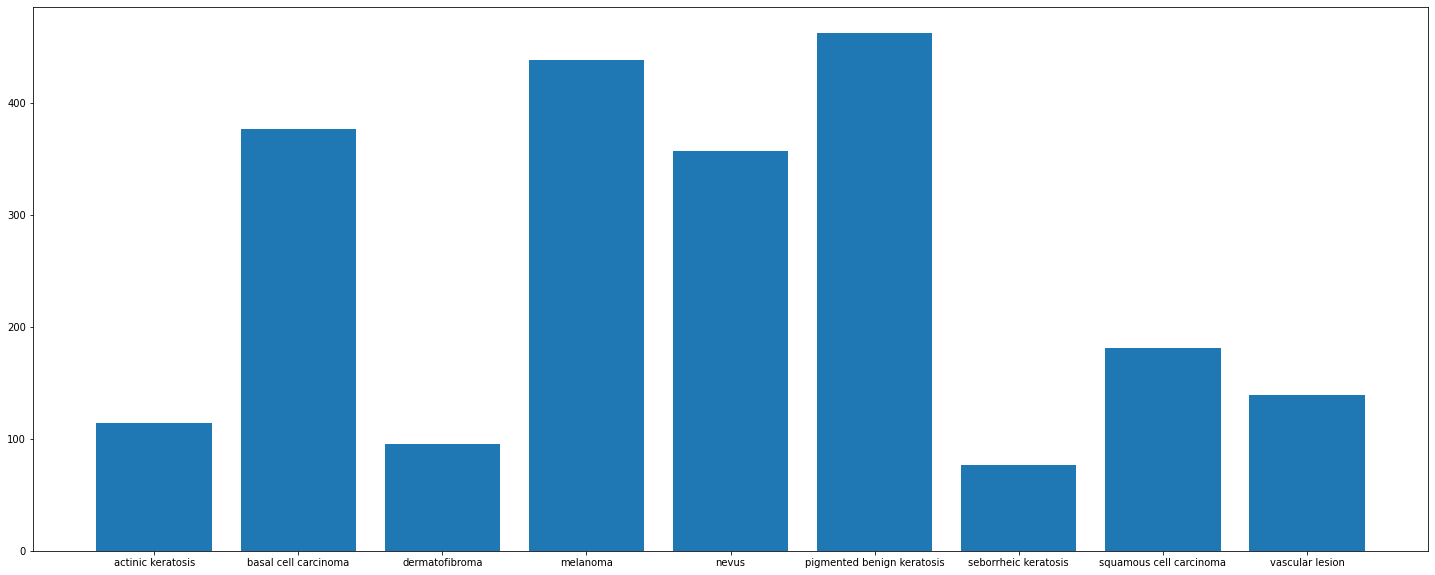

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

 **Todo: Write your findings here:**



**1.   Which class has the least number of samples?**

**Answer-**  squamous cell carcinoma has least number of samples

**2.   Which classes dominate the data in terms proportionate number of samples?**

**Answer-** actinic keratosis and dermatofibroma, melanoma and pigmented benign keratosis have proportionate number of classes.



In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

# **Handling class imbalances**

**To do: Rectify the class imbalance** 


**Context:** You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:


*   Instantiate a Pipeline object pointing to a directory containing your initial image data set.
*   Define a number of operations to perform on this data set using your Pipeline object.
*   Execute these operations by calling the Pipeline’s sample() method.







In [28]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16E9CF4A50>: 100%|██████████| 500/500 [00:52<00:00,  9.53 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16E87A7ED0>: 100%|██████████| 500/500 [00:42<00:00, 11.64 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16E9C53CD0>: 100%|██████████| 500/500 [00:44<00:00, 11.18 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16EA1D5B10>: 100%|██████████| 500/500 [00:38<00:00, 12.91 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F16EA18CD10>: 100%|██████████| 500/500 [00:39<00:00, 12.56 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F16EA1CAE90>: 100%|██████████| 500/500 [00:51<00:00,  9.67 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16E9DB7F50>: 100%|██████████| 500/500 [00:38<00:00, 13.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F16EA068A50>: 100%|██████████| 500/500 [00:47<00:00, 10.63 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F16E87536D0>: 100%|██████████| 500/500 [00:49<00:00, 10.09 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [31]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
1,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
2,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
3,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
4,/content/drive/MyDrive/ColabNotebooks/Melanoma...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
6735,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
6736,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion
6737,/content/drive/MyDrive/ColabNotebooks/Melanoma...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    1380
melanoma                      1304
basal cell carcinoma          1130
nevus                         1081
squamous cell carcinoma        546
vascular lesion                425
actinic keratosis              343
dermatofibroma                 295
seborrheic keratosis           235
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# **Model Building & training on the rectified class imbalance data** 

**To do: Train the model on the data created using Augmentor**

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [59]:
import pathlib
data_dir_train1=pathlib.Path("/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_train1

PosixPath('/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

**To do: Create a training dataset**

In [60]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [61]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/ColabNotebooks/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


**To do: Create a validation dataset**

In [62]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


**To do: Create your model (make sure to include normalization)**

In [63]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

**To do: Compile your model (Choose optimizer and loss function appropriately)**



In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**To do: Train your model**

In [65]:
epochs =30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 37s 212ms/step - loss: nan - accuracy: 0.0195 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/30
169/169 [==============================] - 36s 208ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/30
169/169 [==============================] - 36s 208ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/30
169/169 [==============================] - 37s 212ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/30
169/169 [==============================] - 36s 207ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/30
169/169 [==============================] - 36s 209ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/30
169/169 [==============================] - 36s 206ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/30
169/169 [=======

**To do: Visualize the model results**

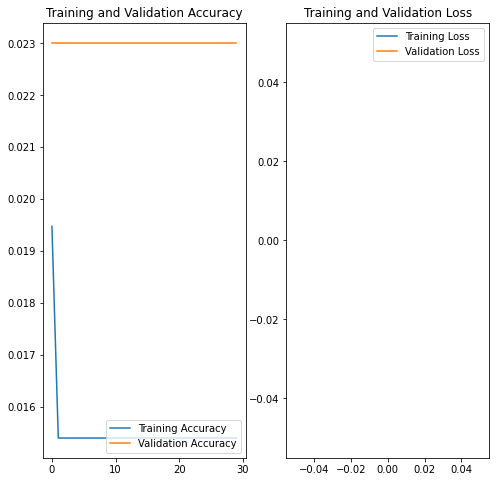

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**To do: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**


*   The class rebalance helped in reducing overfititng of the data and thus the loss is reduced But it has reduced the Acurracy to very low
*   Initially we tried without the ImageDataGenerator which created data to over fit at high ratio, Then we introduced dropout and ImageDataGenerator which reduced the over fit
*   At last we tried Batch Normalization and Augumentation which really helped in carry forward